# Корреляция добычи нефти и газа

Проверял корреляцию, т.к. думал, что скважины используются для добычи нефти и газа одновременно. Однако потом выяснил, что за исключением скважины Jay, газонасыщение пласта равно 0 и приток газа, видимо, обусловлен газлифтом.

In [20]:
oilgas_wells = production_data.loc[oil_producers_list, :]
oilgas_wells

,Time (Days),Choke Size,Gas Volume (MMscf),Oil Volume (stb),Water Volume (stb),Gas Lift Inj Volume (MMscf),Casing Pressure (psi(a)),Tubing Pressure (psi(a)),Active Pressure (psi(a)),Line Pressure (psi(a)),Pressure Source,Calculated Sandface Pressure (psi(a))
Lease,,,,,,,,,,,,
CARDINAL,0.0,NaN,0.00000,0.00,0.0,NaN,0.000000,0.000000,0.000000,59.585943,Tubing Pressure,NaN
CARDINAL,1.0,NaN,0.00000,0.00,374.0,NaN,0.000000,2400.000000,2400.000000,59.585943,Tubing Pressure,6211.543163
CARDINAL,2.0,NaN,0.00000,12.08,986.0,NaN,0.000000,2300.000000,2300.000000,59.585943,Tubing Pressure,6107.965265
CARDINAL,3.0,NaN,0.03852,107.92,979.0,NaN,0.000000,2275.000000,2275.000000,59.585943,Tubing Pressure,5938.098281
CARDINAL,4.0,NaN,0.04470,110.00,948.0,NaN,0.000000,2225.000000,2225.000000,59.585943,Tubing Pressure,5878.435954
...,...,...,...,...,...,...,...,...,...,...,...,...
SWIFT,1241.0,NaN,0.03237,61.00,41.0,0.0,86.495943,119.639943,86.495943,14.695943,Casing Pressure,1844.416556
SWIFT,1242.0,NaN,0.03100,53.00,0.0,0.0,84.820943,97.028943,84.820943,14.695943,Casing Pressure,1795.906342
SWIFT,1243.0,NaN,0.03000,28.00,23.0,0.0,86.695943,117.195943,86.695943,14.695943,Casing Pressure,1851.028265


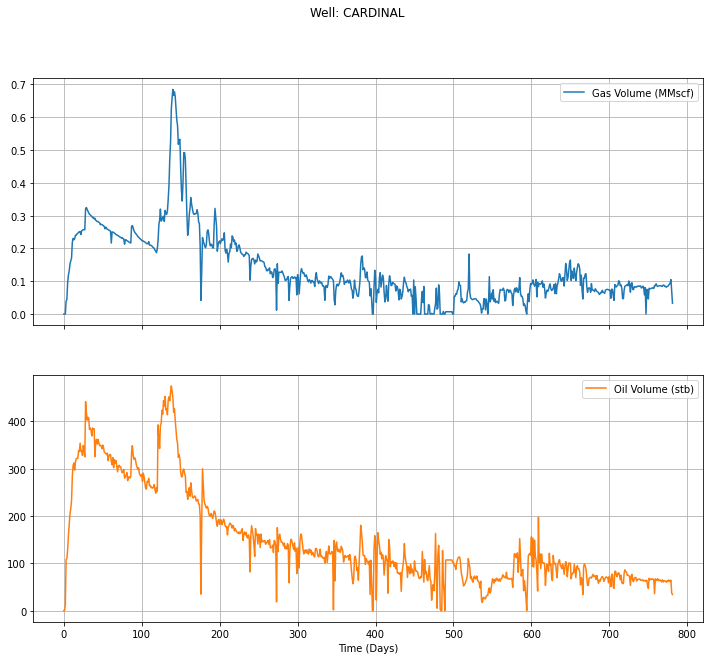

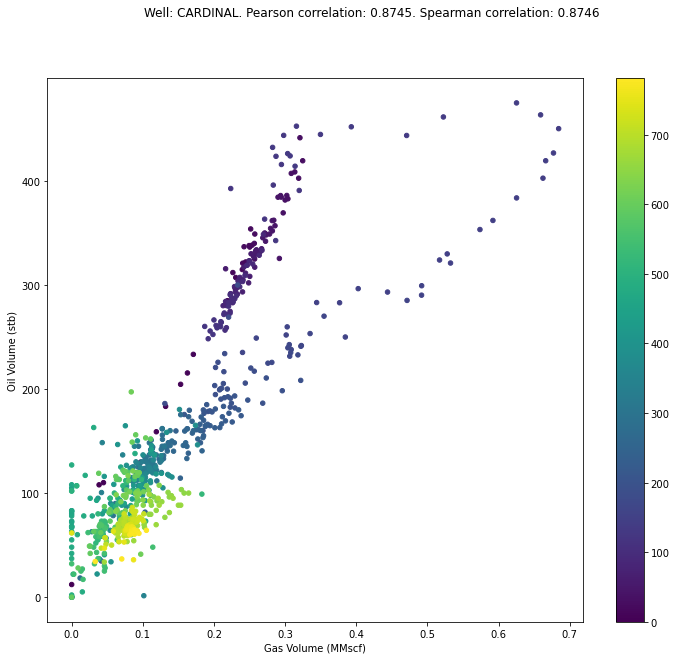

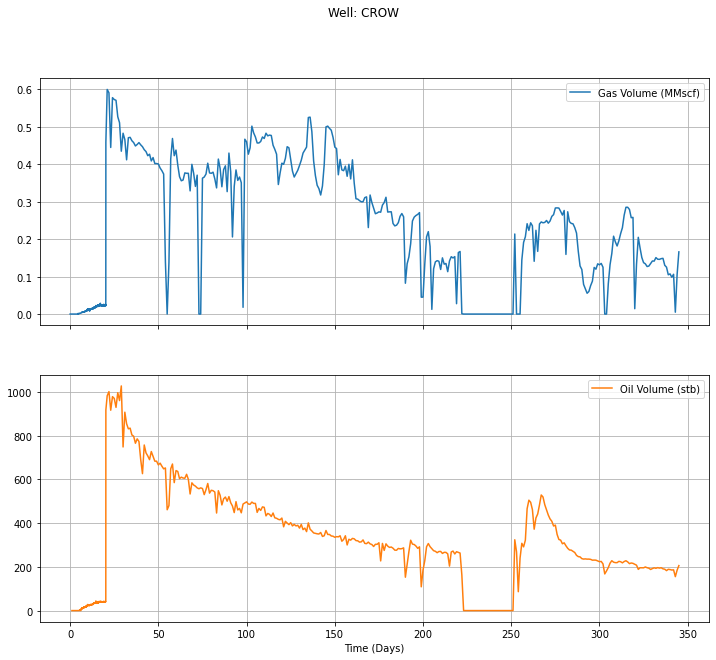

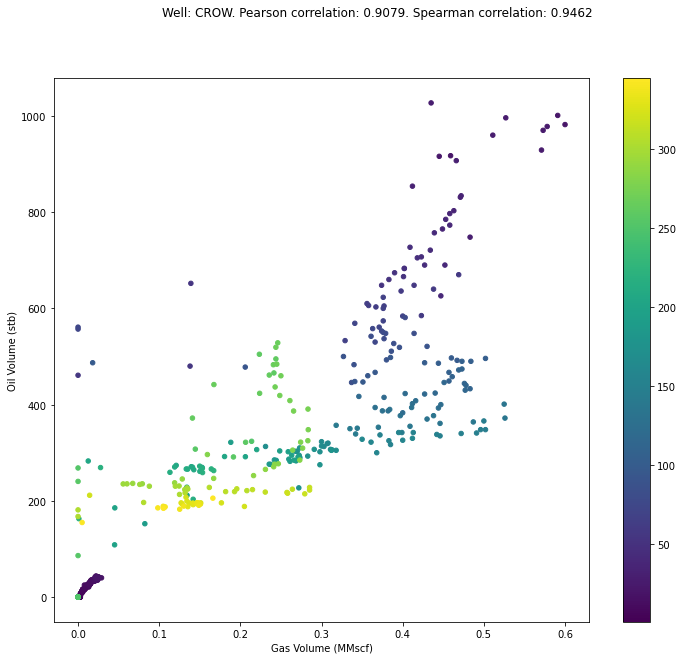

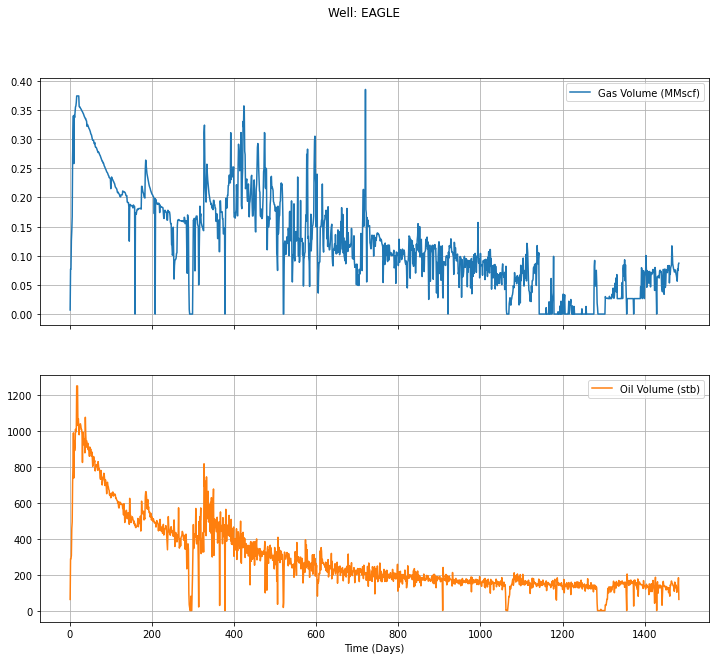

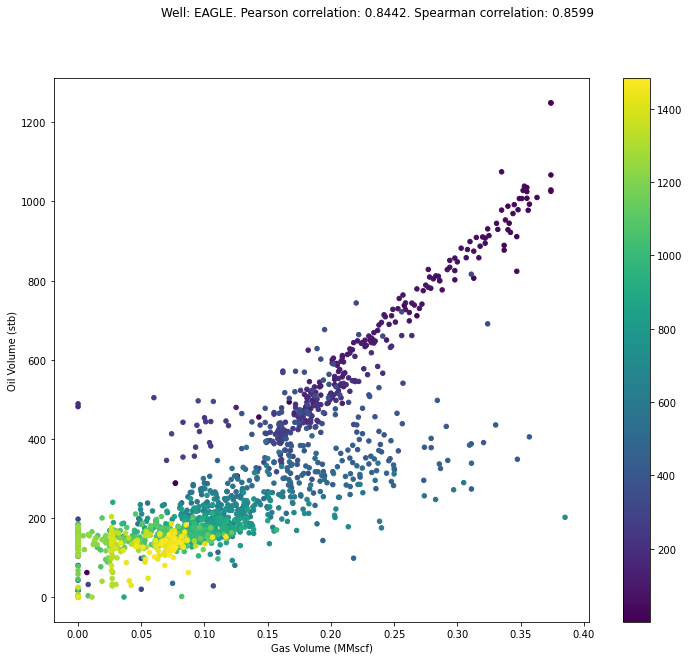

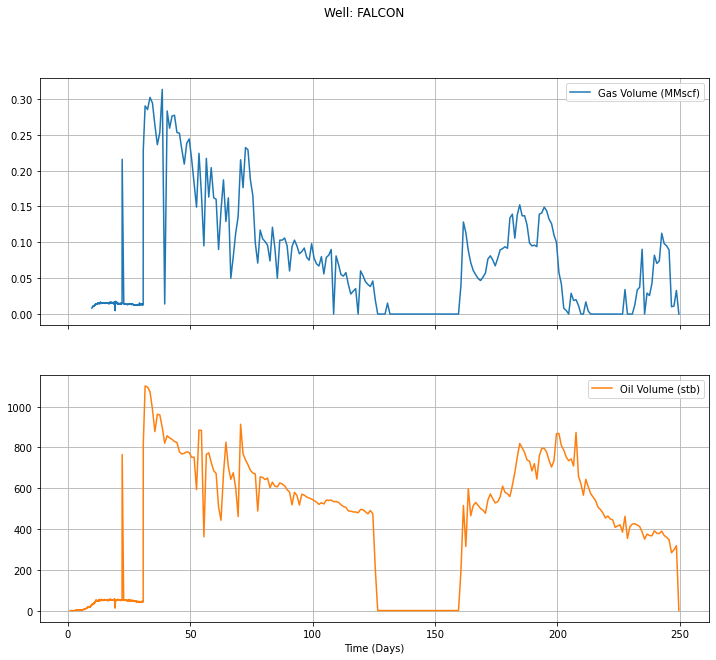

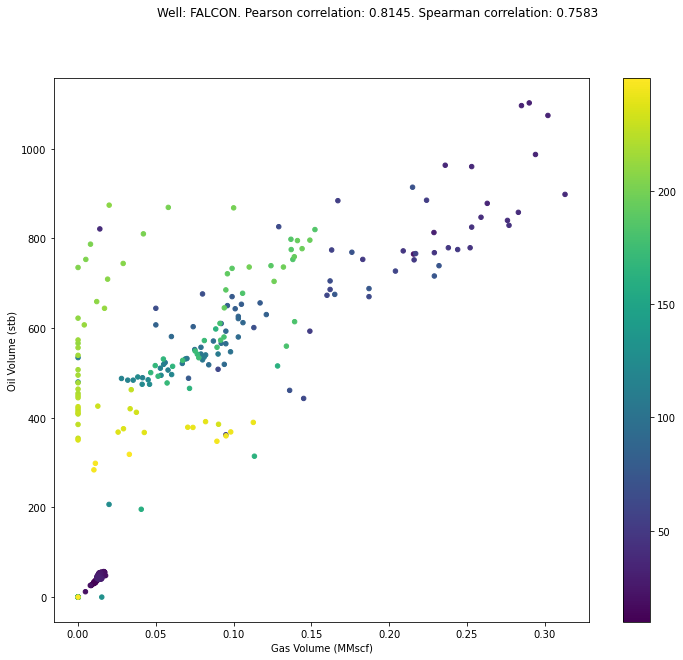

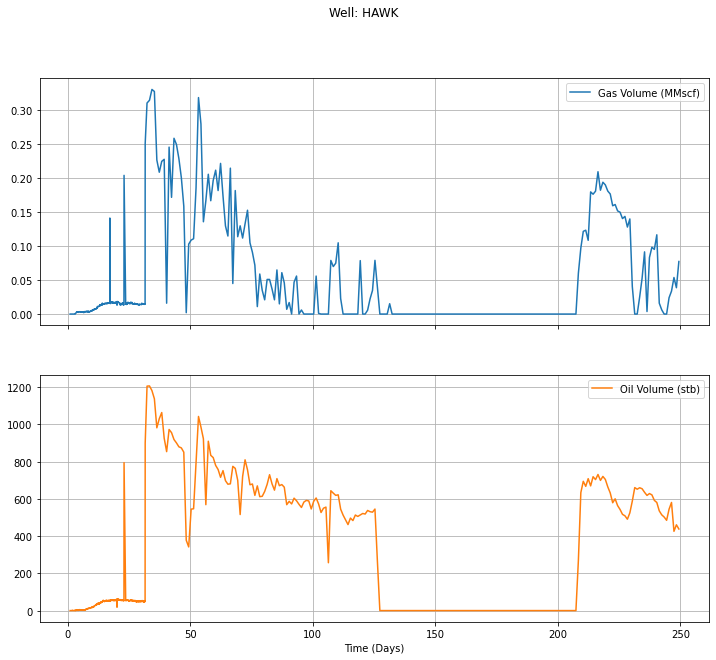

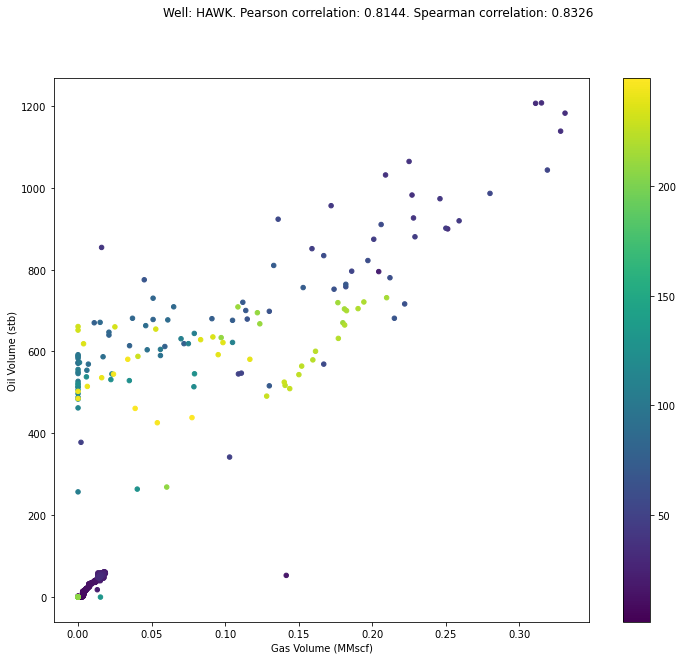

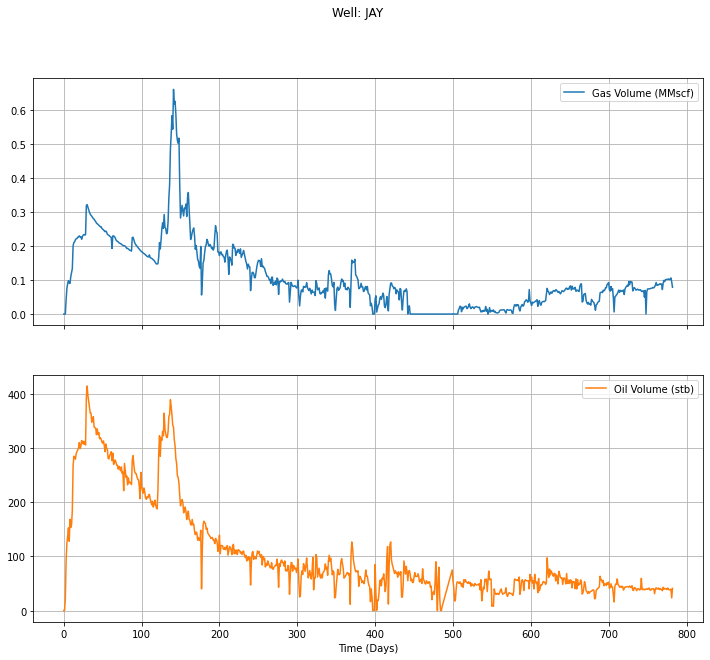

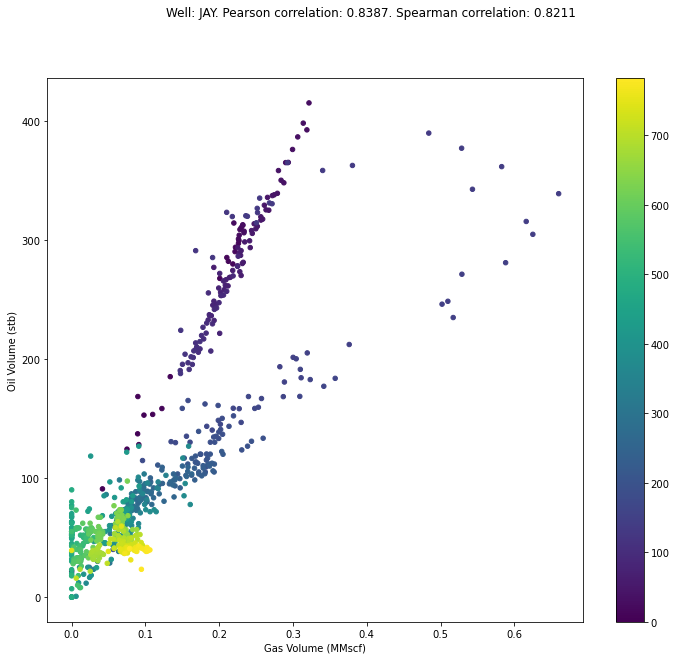

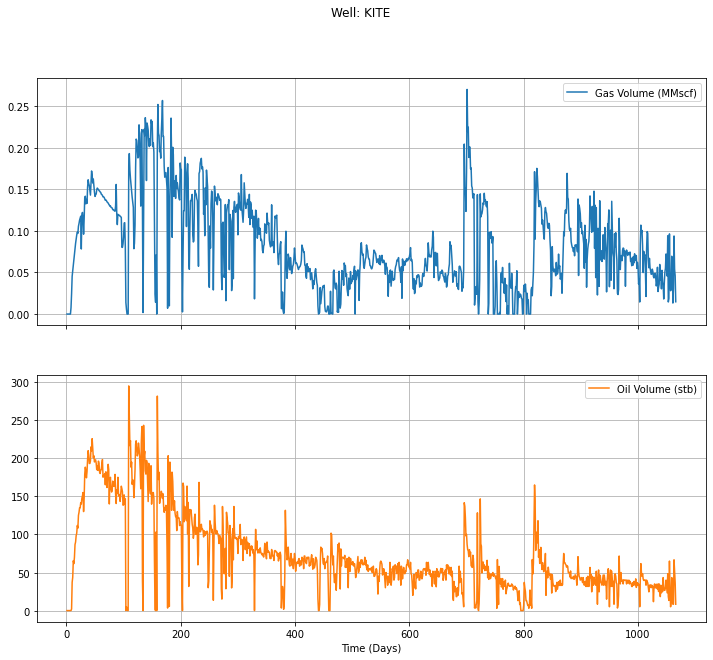

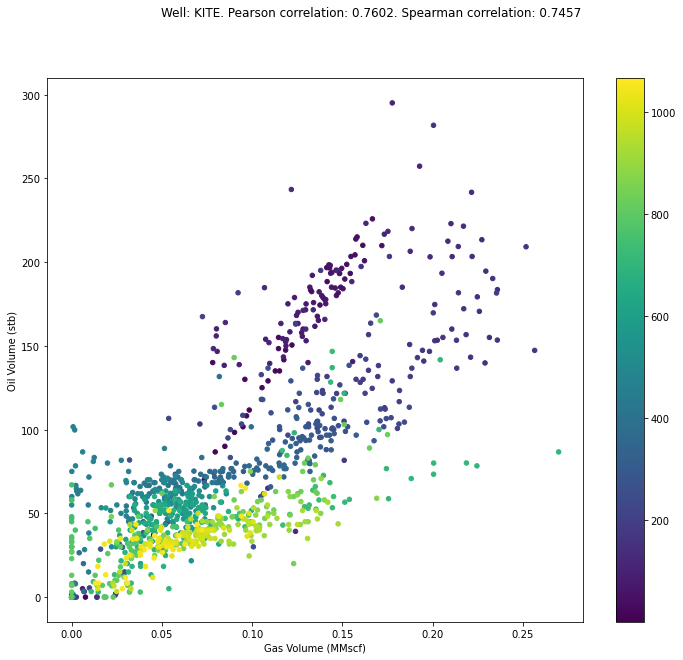

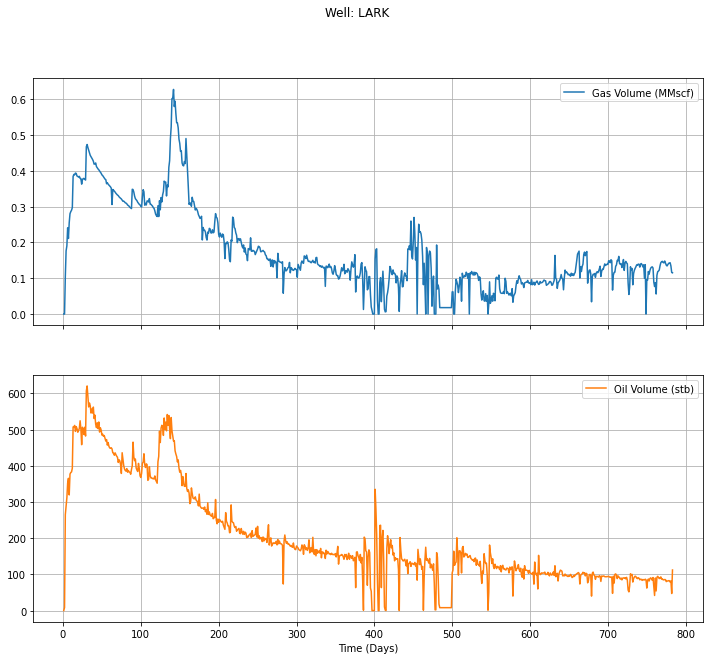

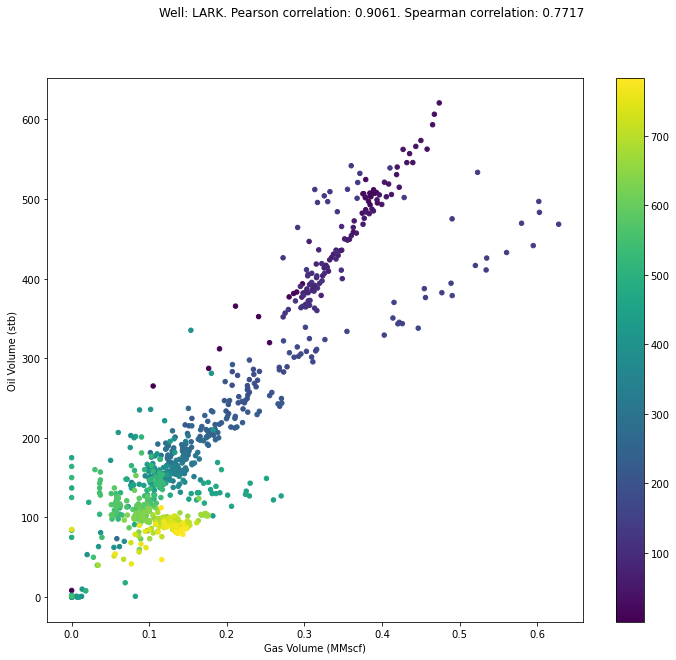

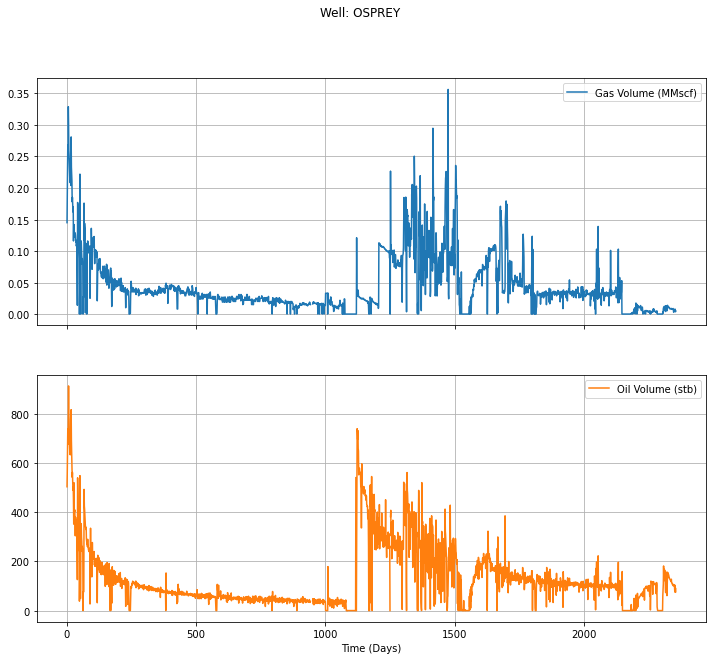

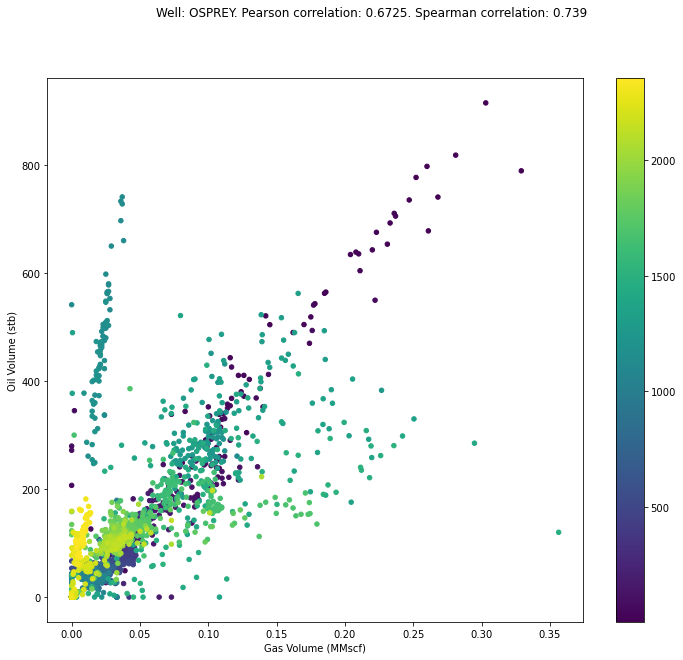

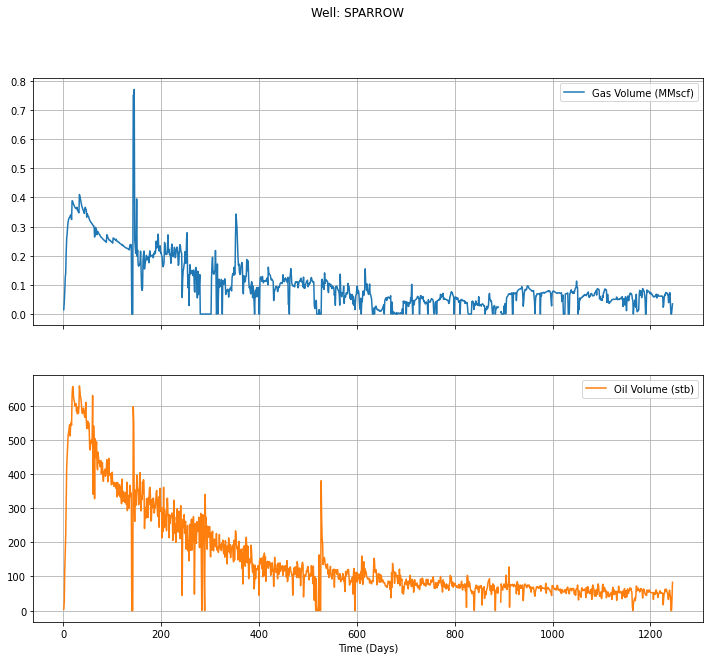

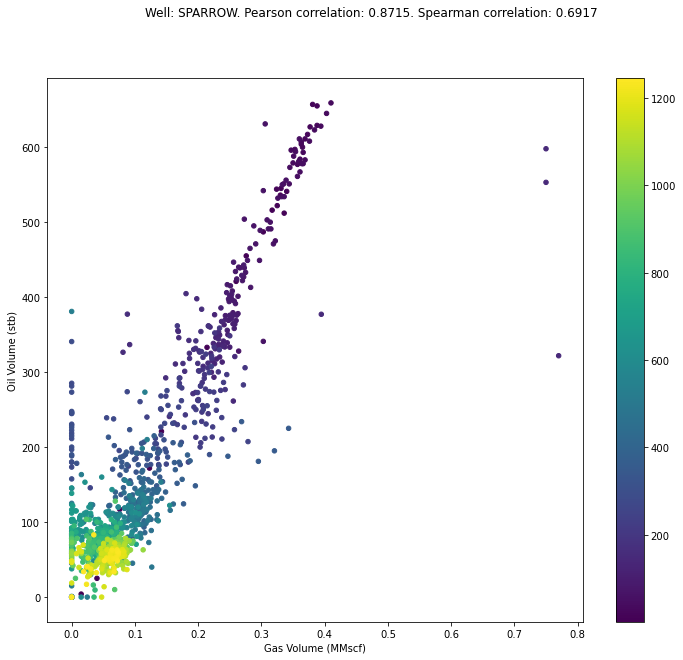

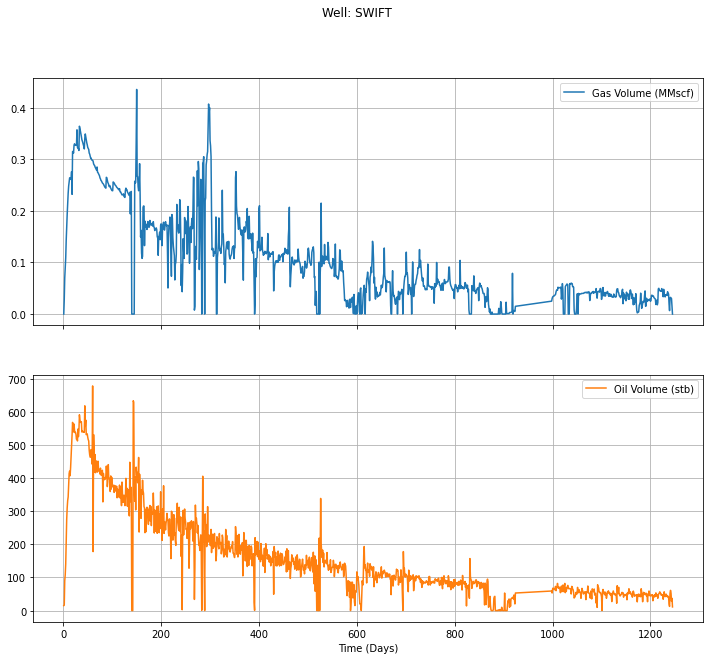

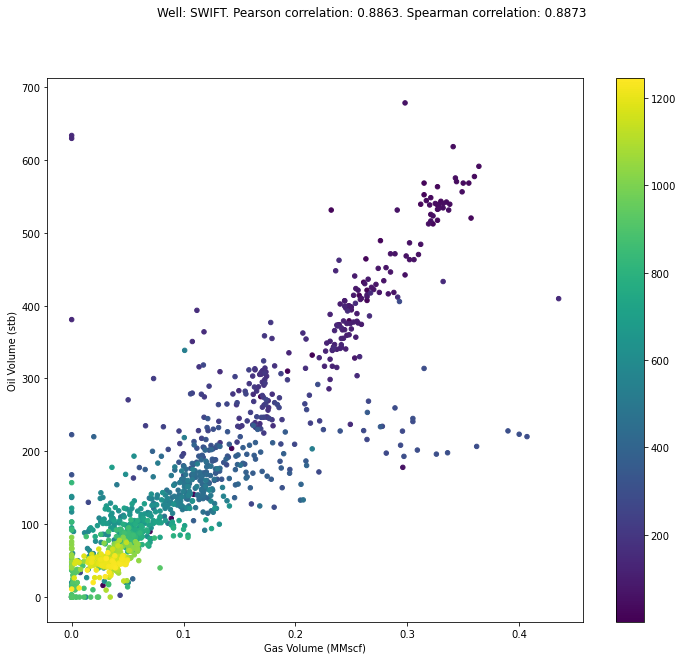

In [39]:
for well in oil_producers_list:
    temp = production_data.loc[well, :]
    temp.plot(x='Time (Days)',
              y=['Gas Volume (MMscf)', 'Oil Volume (stb)'],
             kind='line',
              figsize=(12,10),
             title='Well: ' + well,
             subplots=True,
             sharex=True,
             grid=True
             )
    plt.show();
    pearson = round(temp['Gas Volume (MMscf)'].corr(temp['Oil Volume (stb)'],
                                         method='pearson'), 4)
    spearman = round(temp['Gas Volume (MMscf)'].corr(temp['Oil Volume (stb)'],
                                         method='spearman'), 4)
    temp.plot(x='Gas Volume (MMscf)',
              y='Oil Volume (stb)',
             kind='scatter',
              figsize=(12,10),
             title='Well: ' + well + '. Pearson correlation: {}. Spearman correlation: {}'.format(pearson, spearman),
             subplots=True,
             c=temp['Time (Days)'],
             colorbar=True,
             xlabel='Gas Volume (MMscf)',
             sharex=False)
    plt.show();
    

Корреляция между дебитом нефти и газа есть, но коэффициент корреляции может быть разным на разных этапах эксплуатации. Визуально на ранних этапах корреляция лучше.